1.	Write a series of for loops that compute the average value in torch_tensor3d (refer to torch_tensor3d in Week01 Activity)

In [30]:
import torch

torch_tensor3d = torch.tensor([
[
[ 1, 2, 3],
[ 4, 5, 6],
],
[
[ 7, 8, 9],
[10, 11, 12],
],
[
[13, 14, 15],
[16, 17, 18],
],
[
[19, 20, 21],
[22, 23, 24],
]
])


In [31]:
total = 0
count = 0

for i in range(torch_tensor3d.shape[0]):
    for j in range(torch_tensor3d.shape[1]):
        for k in range(torch_tensor3d.shape[2]):
            total += torch_tensor3d[i][j][k]
            count += 1

average = total / count
print("Average value (manual):", average)


Average value (manual): tensor(12.5000)


In [32]:
print(torch.mean(torch_tensor3d.float()))


tensor(12.5000)


	For every power of 2 (i.e., 2i or 2**i ) up to 211, create a random matrix X ∈ R  2i;2i (i.e., X.shape should give (2**i, 2**i)). Time how long it takes to compute XX (i.e., X @ X) on a CPU and on a GPU, and plot the speedup. For what matrix sizes is the CPU faster than the GPU?



Using device: cuda


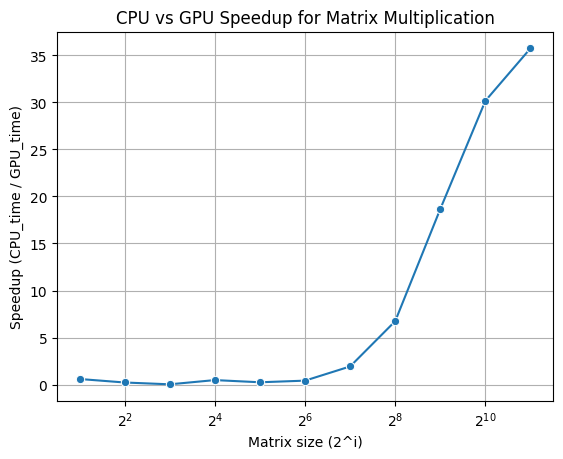

In [33]:
import torch
import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt  # For plotting axis scale and labels

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

cpu_times = []
gpu_times = []
sizes = []

for i in range(1, 12):
    n = 2 ** i
    sizes.append(n)
    X_cpu = torch.rand((n, n))

    # Time CPU
    start = time.time()
    _ = X_cpu @ X_cpu
    end = time.time()
    cpu_times.append(end - start)

    # Time GPU
    X_gpu = X_cpu.to(device)
    torch.cuda.synchronize()
    start = time.time()
    _ = X_gpu @ X_gpu
    torch.cuda.synchronize()
    end = time.time()
    gpu_times.append(end - start)

speedup = [c / g if g > 0 else 0 for c, g in zip(cpu_times, gpu_times)]

df = pd.DataFrame({"Matrix Size": sizes, "Speedup": speedup})

sns.lineplot(data=df, x="Matrix Size", y="Speedup", marker="o")
plt.xscale('log', base=2)
plt.xlabel("Matrix size (2^i)")
plt.ylabel("Speedup (CPU_time / GPU_time)")
plt.title("CPU vs GPU Speedup for Matrix Multiplication")
plt.grid(True)
plt.show()


	We used PyTorch to find the numeric solution to f(x) = (x - 2)2. Write code that
finds the solution to f(x) = sin(x - 2) · (x + 2)2 +√(| cos(x)|). What answer do you get?


In [34]:
import torch

def f(x):
    return torch.sin(x - 2) * (x + 2)**2 + torch.sqrt(torch.cos(x))

x_param = torch.nn.Parameter(torch.tensor([0.0]), requires_grad=True)
optimizer = torch.optim.SGD([x_param], lr=0.01)

for epoch in range(1000):
    optimizer.zero_grad()
    loss = f(x_param)
    loss.backward()
    optimizer.step()

print("Optimized x:", x_param.data)
print("Function value at optimized x:", f(x_param).item())


Optimized x: tensor([1.0635])
Function value at optimized x: -6.862534046173096


4.	Write a new function that takes two inputs, x and y, where
f(x; y) = exp(sin(x)2) /(x - y)2 + (x - y)2

Use an Optimizer with initial parameter values of x = 0:2 and y = 10. What do
they converge to?


In [36]:
def f_xy(x, y):
    numerator = torch.exp(torch.sin(x)**2)
    denominator = (x - y)**2
    return numerator / denominator + denominator

# parameters
x_param = torch.nn.Parameter(torch.tensor([0.2]), requires_grad=True)
y_param = torch.nn.Parameter(torch.tensor([10.0]), requires_grad=True)

optimizer = torch.optim.SGD([x_param, y_param], lr=0.01)

for epoch in range(1000):
    optimizer.zero_grad()
    loss = f_xy(x_param, y_param)
    loss.backward()
    optimizer.step()

print("Optimized x:", x_param.data)
print("Optimized y:", y_param.data)
print("Function value at optimized (x, y):", f_xy(x_param, y_param).item())


Optimized x: tensor([50.2657])
Optimized y: tensor([49.2657])
Function value at optimized (x, y): 2.0
